In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline

## How do different season of the year affect the price?

In [2]:
cal = pd.read_csv('./Boston/calendar.csv')

In [3]:
cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
# convert string to date time format
cal['date'] = pd.to_datetime(cal['date'])
cal['month_year'] = cal['date'].dt.to_period('M')
cal['weekday'] = cal['date'].dt.day_name()

# convert price from string to float
cal['price'] = cal['price'].fillna('$0')
cal['price'] = cal['price'].apply(lambda x:float(x[1:].replace(',',''))) 

# Make available to quantitative
cal['available'] = cal['available'].apply(lambda a: 0 if a=='f' else 1)


In [5]:
# Take only available airbnb
cal_avai = cal[cal['available']==1]
cal_avai.head()

,listing_id,date,available,price,month_year,weekday
365,3075044,2017-08-22,1,65.0,2017-08,Tuesday
366,3075044,2017-08-21,1,65.0,2017-08,Monday
367,3075044,2017-08-20,1,65.0,2017-08,Sunday
368,3075044,2017-08-19,1,75.0,2017-08,Saturday
369,3075044,2017-08-18,1,75.0,2017-08,Friday


<AxesSubplot:>

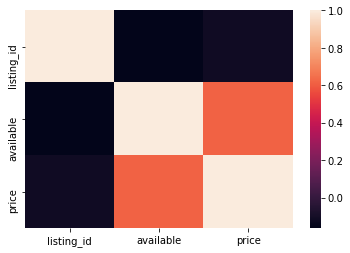

In [6]:
sns.heatmap(cal.corr())
## price vs availability has the strongest relationship according to the heatmap

In [7]:
price_time = pd.DataFrame(cal_avai.groupby('month_year').mean())
available_time = pd.DataFrame(cal.groupby('month_year').sum())


price_weekday = pd.DataFrame(cal_avai.groupby('weekday').mean())

med_price = pd.DataFrame(cal_avai[['price', 'month_year']].groupby('month_year').median())
available_time.head()

,listing_id,available,price
month_year,,,
2016-09,756835858650,24401,6165579.0
2016-10,938476464726,46345,10817676.0
2016-11,908203030380,58888,11949813.0
2016-12,938476464726,60997,11748139.0
2017-01,938476464726,63181,11549466.0


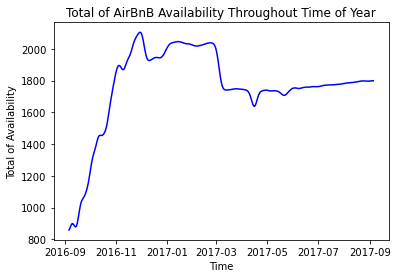

In [8]:
plt.plot(
    cal.groupby('date').sum().index, 
    gaussian_filter1d(cal.groupby('date').sum()['available'], sigma=3), 
    'blue'
    )
plt.title('Total of AirBnB Availability Throughout Time of Year')
plt.xlabel('Time')
plt.ylabel('Total of Availability')
plt.show()

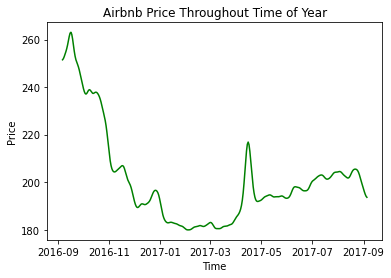

In [9]:
plt.plot(
    cal_avai.groupby('date').mean().index, 
    gaussian_filter1d(cal_avai.groupby('date').mean()['price'], sigma=3), 
    'green'
    )
plt.title('Airbnb Price Throughout Time of Year')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

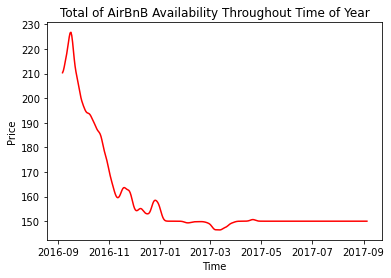

In [10]:
plt.plot(
    cal_avai.groupby('date').median().index, 
    gaussian_filter1d(cal_avai.groupby('date').median()['price'], sigma=3), 
    'red'
    )
plt.title('Total of AirBnB Availability Throughout Time of Year')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

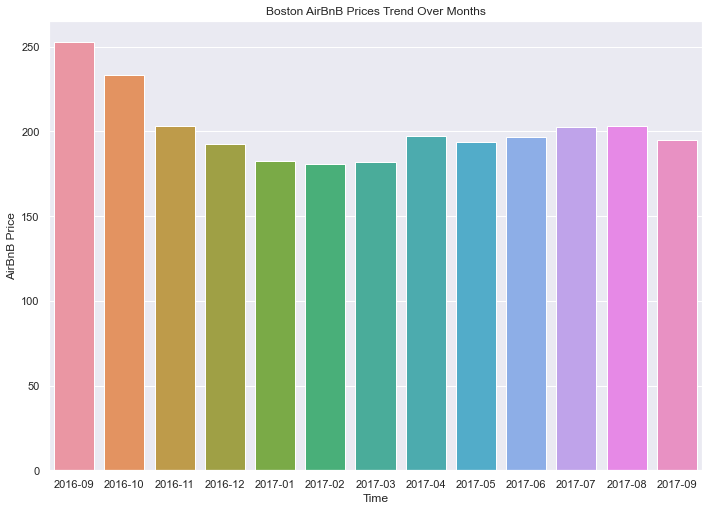

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x=price_time.index, y=price_time['price'], data=price_time)
ax.set_title('Boston AirBnB Prices Trend Over Months')
ax.set_xlabel("Time")
ax.set_ylabel("AirBnB Price")
plt.show()

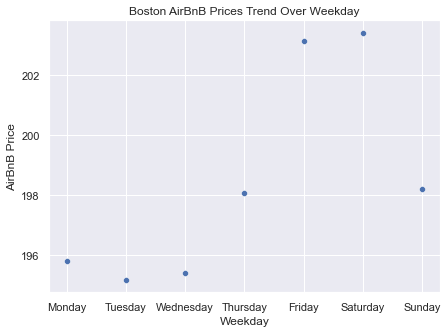

In [12]:
price_weekday.index = pd.Categorical(price_weekday.index, categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.scatterplot(x=price_weekday.index, y=price_weekday['price'], data=price_weekday)
ax.set_title('Boston AirBnB Prices Trend Over Weekday')
ax.set_xlabel("Weekday")
ax.set_ylabel("AirBnB Price")
plt.show()